In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
results_dir = '/shared/2/projects/cross-lingual-exchange/results/'
dfs = {}
dfs['betw'] = pd.read_csv(os.path.join(results_dir,'att_betweenness_11-02-2021.tsv'),sep='\t')
dfs['domain'] = pd.read_csv(os.path.join(results_dir,'att_domains_top100_with_rt_11-02-2021.tsv'),sep='\t')
dfs['hashtag'] = pd.read_csv(os.path.join(results_dir,'att_temporal_hashtags_top100_with_rt_11-02-2021.tsv'),sep='\t')
dfs['politics'] = pd.read_csv(os.path.join(results_dir,'politics_att_temporal_hashtag_top100_with_rt.tsv'),sep='\t')
dfs['entertainment'] = pd.read_csv(os.path.join(results_dir,'entertainment_att_temporal_hashtag_top100_with_rt.tsv'),sep='\t')
dfs['promotion'] = pd.read_csv(os.path.join(results_dir,'promotion_att_temporal_hashtag_top100_with_rt.tsv'),sep='\t')
dfs['sports'] = pd.read_csv(os.path.join(results_dir,'sports_att_temporal_hashtag_top100_with_rt.tsv'),sep='\t')


In [3]:
dataframes_dir = '/shared/2/projects/cross-lingual-exchange/data/multilingual_friend_effect_dataframes_top100/'
country_pairs = os.listdir(dataframes_dir)
dataframes = []
for country_pair in country_pairs:
    countries = country_pair.split('_')
    for country in countries:
        df = pd.read_csv(os.path.join(dataframes_dir,country_pair,country+'.gz'),compression='gzip',sep='\t')
        df['scaled_betw'] = 1000000 * df['betw']
        df['log_betw'] = np.log(df['scaled_betw'] + 1)
        dataframes.append(df)
combined_df = pd.concat(dataframes)

In [4]:
combined_df

,Unnamed: 0,id_str,country,monolingual_majority,monolingual_minority,is_bilingual,num_neighbors,num_neighbors_monolingual,num_neighbors_bilingual,has_monolingual_neighbor,...,has_temporal_hashtags_top100_other_language_topic_42,has_temporal_hashtags_top100_other_language_topic_43,has_temporal_hashtags_top100_other_language_topic_44,has_temporal_hashtags_top100_other_language_topic_45,has_temporal_hashtags_top100_other_language_topic_46,has_temporal_hashtags_top100_other_language_topic_47,has_temporal_hashtags_top100_other_language_topic_48,has_temporal_hashtags_top100_other_language_topic_49,scaled_betw,log_betw
0,0,1002331874,GB,1.0,0.0,0.0,30.0,16.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.557308,0.442959
1,1,208710267,GB,1.0,0.0,0.0,72.0,19.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.386209,0.326573
2,2,248800745,GB,1.0,0.0,0.0,65.0,23.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.171647,0.158410
3,3,367982982,GB,1.0,0.0,0.0,39.0,21.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.712760,0.538106
4,4,513552975,GB,1.0,0.0,0.0,51.0,22.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.164703,0.152466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,607,22375722,LT,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
608,608,739772113842769920,LT,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
609,609,14274469,LT,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
610,610,11440772,LT,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.000000,0.000000


In [102]:
combined_df.columns

Index(['Unnamed: 0', 'id_str', 'country', 'monolingual_majority',
       'monolingual_minority', 'is_bilingual', 'num_neighbors',
       'num_neighbors_monolingual', 'num_neighbors_bilingual',
       'has_monolingual_neighbor', 'has_bilingual_neighbor',
       'num_neighbors_same_country', 'num_neighbors_other_country',
       'has_neighbors_same_country', 'has_neighbors_other_country', 'betw',
       'pagerank', 'verified', 'friends_count', 'followers_count',
       'favourites_count', 'statuses_count', 'account_age', 'post_rate',
       'decahose_tweet_count', 'has_domains_top100_other_language',
       'has_temporal_hashtags_top100_other_language',
       'has_temporal_hashtags_top100_other_language_topic_0',
       'has_temporal_hashtags_top100_other_language_topic_1',
       'has_temporal_hashtags_top100_other_language_topic_2',
       'has_temporal_hashtags_top100_other_language_topic_3',
       'has_temporal_hashtags_top100_other_language_topic_4',
       'has_temporal_hashtags_

In [97]:
treated_betw = combined_df[combined_df['is_bilingual']==1]['betw'].mean()
treated_log_betw = combined_df[combined_df['is_bilingual']==1]['log_betw'].mean()
treated_domain = combined_df[(combined_df['monolingual_majority']==1) & (combined_df['has_bilingual_neighbor']==1)]['has_domains_top100_other_language'].mean()
treated_hashtag = combined_df[(combined_df['monolingual_majority']==1) & (combined_df['has_bilingual_neighbor']==1)]['has_temporal_hashtags_top100_other_language'].mean()

#Get avg betweenness values for treated and untreated 
#(not monolingual_minority,betw,scaled_betw,log_betw,is_bilingual)
#Get domain sharing prob for treated and untreated 
#(monolingual majority,has_bilingual_neighbor,has_domain_other_language,has_temporal_hashtag_other_language)

In [101]:
treated_domain,treated_hashtag,treated_log_betw

(0.03990764264930516, 0.07959250722196262, 0.3932715899268829)

In [103]:
margins_dir = '/shared/2/projects/cross-lingual-exchange/models/causal_inference/'
hashtag_margins_file = os.path.join(margins_dir,'margins_all_temporal_hashtags_11-02-2021.tsv')
domain_margins_file = os.path.join(margins_dir,'margins_all_domains_11-02-2021.tsv')


In [104]:
hashtag_marg_df = pd.read_csv(hashtag_margins_file,sep='\t').set_index('factor')
hashtag_marg_df['outcome'] = 'hashtag'
hashtag_marg_df = hashtag_marg_df.loc[['has_bilingual_neighbor']].reset_index()
domain_marg_df = pd.read_csv(domain_margins_file,sep='\t').set_index('factor')
domain_marg_df['outcome'] = 'domain'
domain_marg_df = domain_marg_df.loc[['has_bilingual_neighbor']].reset_index()
#[hashtag_marg_df['factor']=='has_bilingual_neighbor']

In [105]:
marg_df = pd.concat([hashtag_marg_df,domain_marg_df])

In [155]:
domain_marg_df['AME']  #Prob of sharing domain increases by .0066, or 20% (19.99) percent 

0    0.006649
Name: AME, dtype: float64

In [115]:
domain_marg_df['AME'] /(treated_domain - domain_marg_df['AME'])

0    0.199903
Name: AME, dtype: float64

In [156]:
hashtag_marg_df['AME'] #Prob of sharing hashtag increases by .0196, or 32.65 percent

0    0.019592
Name: AME, dtype: float64

In [116]:
hashtag_marg_df['AME'] /(treated_hashtag - hashtag_marg_df['AME'])

0    0.326532
Name: AME, dtype: float64

In [121]:
log_betw_marg = float(dfs['betw'][dfs['betw']['Country Pair']=='all']['Estimate'])

In [125]:
log_betw_marg #(log(blah+1)) #0.034 Increase in log/scaled betweenness

0.0340284259222908

In [122]:
log_betw_marg / (treated_log_betw - log_betw_marg) # 9.47 percent increase in log betweenness

0.09472254264483602

In [154]:
t0 = (treated_log_betw + 1 - np.exp(log_betw_marg))/np.exp(log_betw_marg)
(treated_log_betw - t0)/t0    # 13.45 percent increase in betweenness centrality

0.13446453907084321

In [196]:
df_estimates = pd.DataFrame()
df_estimates = dfs['betw'][['Country Pair','Country','Estimate']]
df_estimates['betw']= df_estimates['Estimate']
for outcome in dfs:
    if outcome != 'betw':
        dfs[outcome][outcome] = dfs[outcome]['Estimate']
        df_estimates = df_estimates.merge(dfs[outcome][['Country Pair','Country',outcome]],on=['Country Pair','Country'],how='outer')

df_estimates = df_estimates[list(dfs.keys())]
df_estimates.columns = ['Betweenness','Domain','Hashtag','Politics','Entertainment','Promotion','Sports']
df_estimates = df_estimates[['Betweenness','Domain','Hashtag','Politics','Entertainment','Sports','Promotion']]

<ipython-input-196-ae25f0f8f8c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estimates['betw']= df_estimates['Estimate']


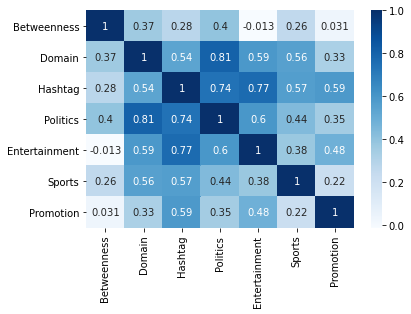

In [290]:
sns.heatmap(df_estimates.corr(),cmap='Blues',annot=True)
plt.savefig(os.path.join(results_dir,'outcome_corr_11-02-2021.pdf'),bbox_inches='tight')

In [286]:
dfs['betw']
selected_pairs = ['GB_PL','DE_TR','NO_SE','ES_PT','FR_RU']

In [287]:
dfs['betw'][dfs['betw']['Country Pair'].isin(selected_pairs)]

,Country Pair,Country,Estimate,Robust Std. Error,Robust P-value,Treated,Untreated
94,DE_TR,DE,0.595710,0.035377,1.485142e-63,1033,124831
95,DE_TR,TR,0.181991,0.016521,3.217263e-28,2022,1157392
143,ES_PT,ES,0.009154,0.003196,4.186513e-03,20598,882566
144,ES_PT,PT,-0.006670,0.003588,6.299852e-02,9674,153614
183,FR_RU,FR,0.680179,0.262361,9.527440e-03,46,810856
184,FR_RU,RU,0.655561,0.165133,7.191798e-05,102,314363
208,GB_PL,GB,0.045775,0.009069,4.474500e-07,3318,2362234
209,GB_PL,PL,0.073197,0.003152,5.273965e-119,22632,78314
294,NO_SE,NO,0.098897,0.059386,9.589369e-02,234,6397
295,NO_SE,SE,0.062091,0.032901,5.914472e-02,643,38120


In [288]:
dfs['domain'][dfs['domain']['Country Pair'].isin(selected_pairs)]

,Country Pair,Country,Estimate,Std. Error,P-value,Robust Std. Error,Robust P-value,Treated_Outcome0,Treated_Outcome1,Untreated_Outcome0,Untreated_Outcome1
64,DE_TR,DE,18.785483,0.130130,2.847542e-112,0.263578,9.170601e-29,3459,71,121243,58
65,DE_TR,TR,4.719783,0.071663,5.898456e-104,0.104298,4.571378e-50,9181,220,1146309,1682
97,ES_PT,ES,1.975584,0.033047,2.724429e-94,0.048963,5.851542e-44,73903,1077,804417,3169
98,ES_PT,PT,0.961562,0.126427,7.565371e-01,0.154804,8.001139e-01,38148,169,115119,178
127,FR_RU,FR,16.951183,0.726879,9.868486e-05,0.532466,1.063505e-07,297,11,810308,240
128,FR_RU,RU,2.103669,0.324350,2.185794e-02,0.311412,1.693554e-02,661,18,313185,499
147,GB_PL,GB,13.975198,0.139359,7.274943e-80,0.207101,3.814429e-37,13379,51,2348596,208
148,GB_PL,PL,1.562349,0.028956,1.699272e-53,0.116059,1.207973e-04,36490,4201,36601,1022
205,NO_SE,NO,0.609581,0.161954,2.249991e-03,0.224895,2.773939e-02,521,64,5532,280
206,NO_SE,SE,0.758725,0.079951,5.538363e-04,0.127280,3.005579e-02,2622,222,33875,1401


In [289]:
dfs['hashtag'][dfs['hashtag']['Country Pair'].isin(selected_pairs)]

,Country Pair,Country,Estimate,Std. Error,P-value,Robust Std. Error,Robust P-value,Treated_Outcome0,Treated_Outcome1,Untreated_Outcome0,Untreated_Outcome1
80,DE_TR,DE,4.588922,0.069943,5.157505e-105,0.093944,3.723113e-59,3249,281,120311,990
81,DE_TR,TR,2.419483,0.042124,1.157573e-97,0.048310,1.006707e-74,8678,723,1134189,13802
125,ES_PT,ES,1.451451,0.012851,1.076901e-184,0.016217,8.582135e-117,65838,9142,762243,45343
126,ES_PT,PT,1.093456,0.031426,4.469932e-03,0.043705,4.092868e-02,36673,1644,112769,2528
168,FR_RU,FR,2.911069,0.176670,1.466290e-09,0.181798,4.164791e-09,254,54,791664,18884
169,FR_RU,RU,2.430640,0.189115,2.649502e-06,0.200759,9.689480e-06,644,35,311693,1991
191,GB_PL,GB,2.424240,0.041985,9.796378e-99,0.047750,8.975284e-77,12817,613,2332354,16450
192,GB_PL,PL,0.999048,0.024636,9.691598e-01,0.141574,9.946321e-01,36324,4367,36046,1577
271,NO_SE,NO,0.775758,0.149298,8.904305e-02,0.221649,2.519736e-01,511,74,5431,381
272,NO_SE,SE,0.870894,0.058466,1.806512e-02,0.079431,8.180223e-02,2314,530,31239,4037


In [5]:
overall_mean = combined_df['log_betw'].mean()
mono_mean = combined_df[combined_df['is_bilingual']==0]['log_betw'].mean()
multi_mean = combined_df[combined_df['is_bilingual']==1]['log_betw'].mean()

In [6]:
overall_mean

0.41315355165103534

In [7]:
multi_mean

0.3932715899268829

In [8]:
mono_mean

0.4133676694461016